In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Loading the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data       # Feature matrix 30 features for each sample
y = breast_cancer.target     # Target labels malignant

# Check for and handle missing values
# Creating an imputer object with a mean filling strategy
imputer = SimpleImputer(strategy='mean')
# Applying the imputer to fill any missing values in the dataset
X_imputed = imputer.fit_transform(X)

# Normalization of the data
#scaler object to standardize the features with mean=0 and variance=1
scaler = StandardScaler()
# Apply standardization to the dataset
X_scaled = scaler.fit_transform(X_imputed)
# Initialize PCA, reducing the dataset to 2 dimensions for easy visualization
pca = PCA(n_components=2)
# Apply PCA to the scaled data and store the result
X_pca = pca.fit_transform(X_scaled)





n_clusters=2, init=k-means++, n_init=10, max_iter=300
Silhouette Score: 0.5084690190672024


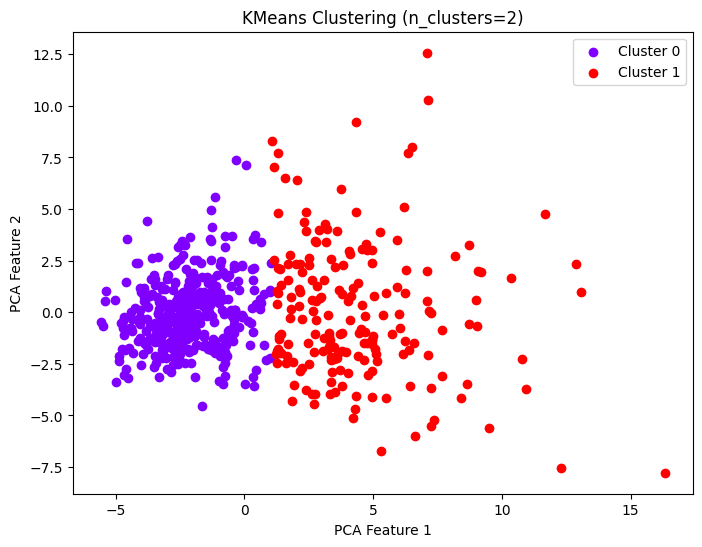

n_clusters=3, init=k-means++, n_init=10, max_iter=300
Silhouette Score: 0.476672446073996


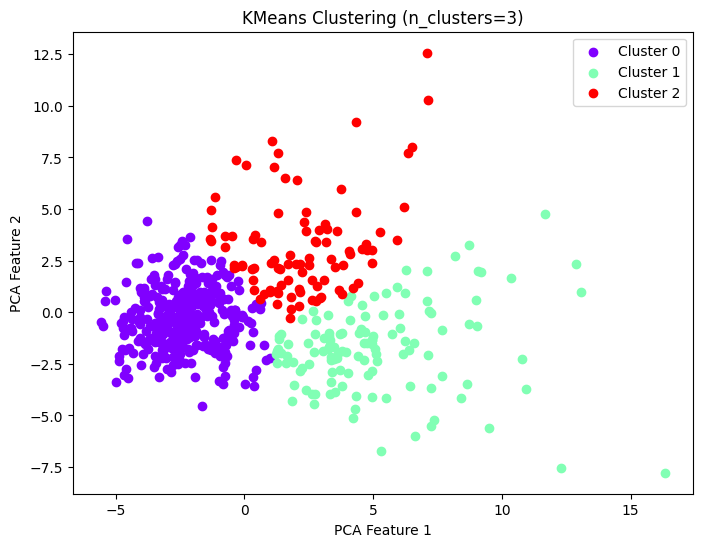

n_clusters=4, init=k-means++, n_init=10, max_iter=300
Silhouette Score: 0.4653818735556054


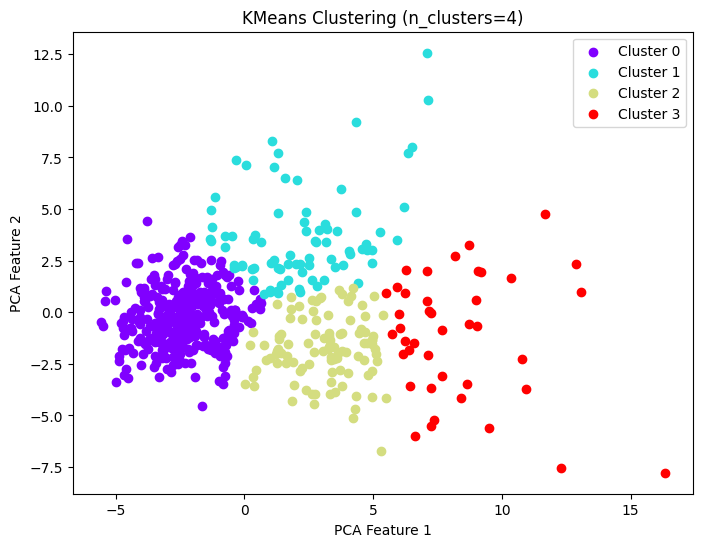

n_clusters=3, init=random, n_init=20, max_iter=400
Silhouette Score: 0.476672446073996


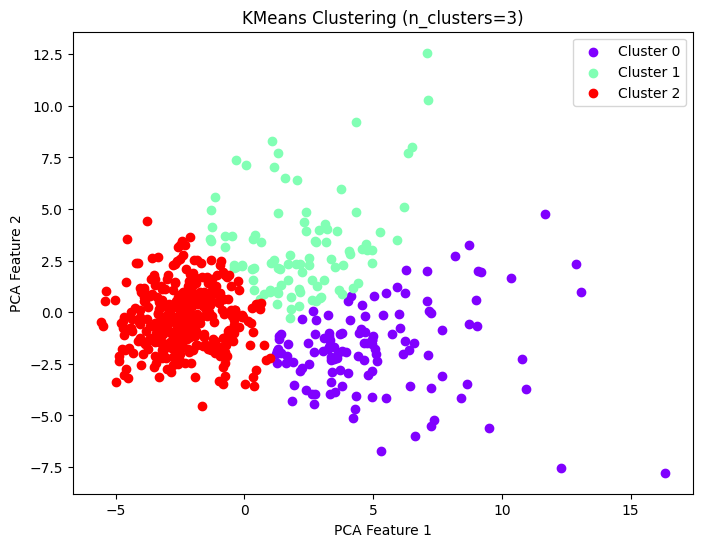

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Function to perform KMeans clustering and plot the results
def perform_and_plot_kmeans(X, n_clusters, init_method='k-means++', n_init_val=10, max_iter_val=300):
#Parameters: X (array), n_clusters (int), init_method (str), n_init_val (int), max_iter_val (int)

    # Initialize and fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, n_init=n_init_val, max_iter=max_iter_val)
    kmeans.fit(X)

    # Cluster labels
    labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"n_clusters={n_clusters}, init={init_method}, n_init={n_init_val}, max_iter={max_iter_val}")
    print(f"Silhouette Score: {silhouette_avg}")

    # Plotting
    plt.figure(figsize=(8, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
    for i, color in enumerate(colors):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], color=color, label=f'Cluster {i}')
    plt.title(f"KMeans Clustering (n_clusters={n_clusters})")
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend()
    plt.show()

# Experimentation with different parameters
# Varying the number of clusters
for n_clusters in range(2, 5):
    perform_and_plot_kmeans(X_pca, n_clusters)

perform_and_plot_kmeans(X_pca, n_clusters=3, init_method='random', n_init_val=20, max_iter_val=400)


n_clusters=2, metric=euclidean, linkage=ward
Silhouette Score: 0.5046397728338724


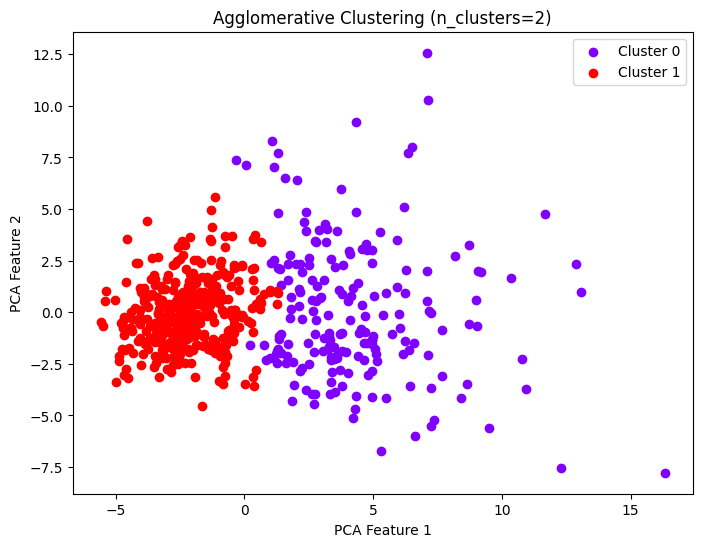

n_clusters=3, metric=euclidean, linkage=ward
Silhouette Score: 0.4853783508495266


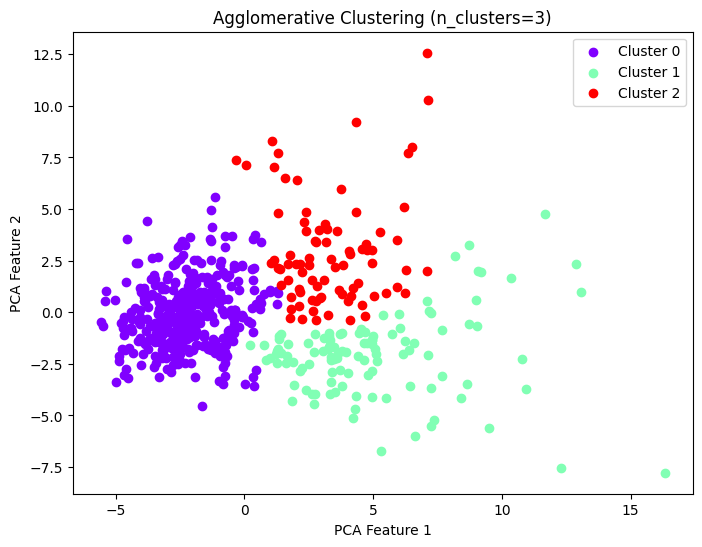

n_clusters=4, metric=euclidean, linkage=ward
Silhouette Score: 0.32651486578081523


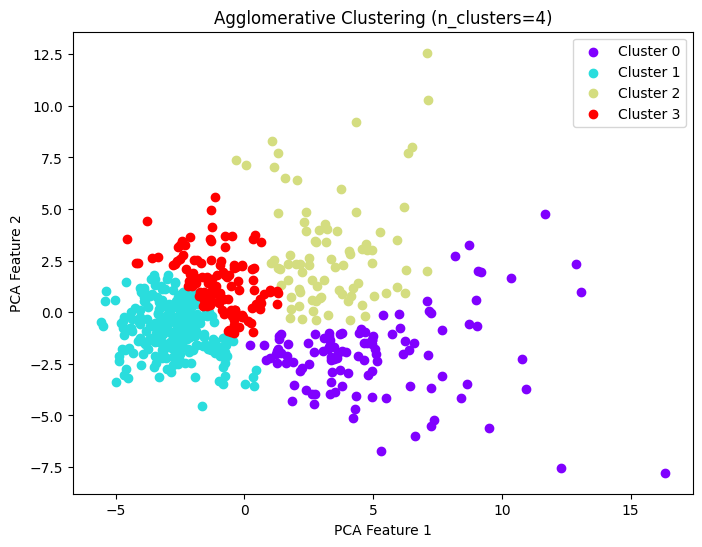

n_clusters=3, metric=manhattan, linkage=complete
Silhouette Score: 0.45129077806636064


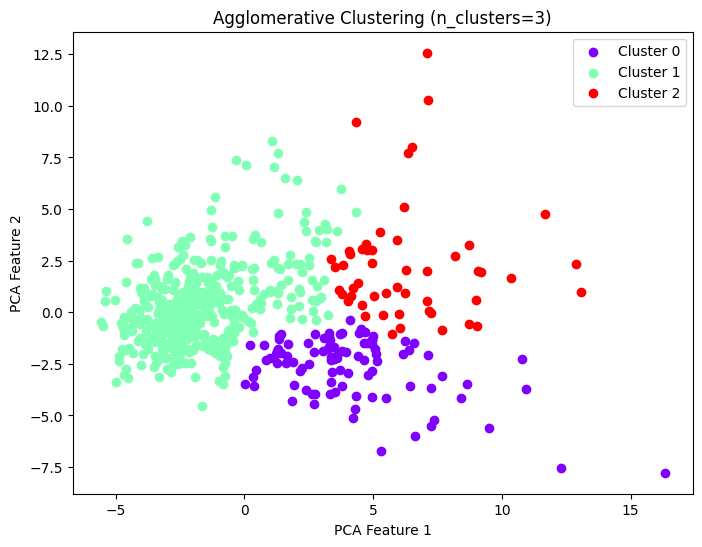

In [7]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Function to perform Agglomerative Clustering and plot the results
def perform_and_plot_agglomerative(X, n_clusters, metric='euclidean', linkage='ward'):
#Parameters: X (array-like), n_clusters (int), metric (str), linkage (str)
#Change: Replaced 'affinity' with 'metric' to match the updated scikit-learn API

#fitting Agglomerative Clustering model
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
    #Change: Replaced 'affinity' with 'metric' in the AgglomerativeClustering initialization
    agglomerative.fit(X)

    # Cluster labels
    labels = agglomerative.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    print(f"n_clusters={n_clusters}, metric={metric}, linkage={linkage}")
    #Change: Updated the print statement to reflect the parameter change
    print(f"Silhouette Score: {silhouette_avg}")

    # Plotting
    plt.figure(figsize=(8, 6))
    colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
    for i, color in enumerate(colors):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], color=color, label=f'Cluster {i}')
    plt.title(f"Agglomerative Clustering (n_clusters={n_clusters})")
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.legend()
    plt.show()

# Experimentation with different parameters
# Varying the number of clusters
for n_clusters in range(2, 5):
    perform_and_plot_agglomerative(X_pca, n_clusters)

perform_and_plot_agglomerative(X_pca, n_clusters=3, metric='manhattan', linkage='complete')
#Change: Replaced 'affinity' with 'metric' in the function call

In [8]:
from sklearn.metrics import davies_bouldin_score

#KMeans clustering and return evaluation metrics
def evaluate_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette_avg, davies_bouldin

#Agglomerative clustering and return evaluation metrics
def evaluate_agglomerative(X, n_clusters, linkage='ward'):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = agglomerative.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette_avg, davies_bouldin

# Testing different number of clusters
cluster_counts = [2, 3, 4, 5]

for n_clusters in cluster_counts:
    silhouette_kmeans, davies_kmeans = evaluate_kmeans(X_pca, n_clusters)
    silhouette_agglo, davies_agglo = evaluate_agglomerative(X_pca, n_clusters)

    print(f"n_clusters={n_clusters}")
    print(f"KMeans - Silhouette Score: {silhouette_kmeans}, Davies-Bouldin Index: {davies_kmeans}")
    print(f"Agglomerative - Silhouette Score: {silhouette_agglo}, Davies-Bouldin Index: {davies_agglo}")
    print("-" * 60)





n_clusters=2
KMeans - Silhouette Score: 0.5084690190672024, Davies-Bouldin Index: 0.8467403809951901
Agglomerative - Silhouette Score: 0.5046397728338724, Davies-Bouldin Index: 0.8590768384206948
------------------------------------------------------------
n_clusters=3
KMeans - Silhouette Score: 0.476672446073996, Davies-Bouldin Index: 0.9105499630175508
Agglomerative - Silhouette Score: 0.4853783508495266, Davies-Bouldin Index: 0.9490530109262103
------------------------------------------------------------
n_clusters=4
KMeans - Silhouette Score: 0.4656018483068952, Davies-Bouldin Index: 0.8839693692335129
Agglomerative - Silhouette Score: 0.32651486578081523, Davies-Bouldin Index: 1.0639592056802019
------------------------------------------------------------
n_clusters=5
KMeans - Silhouette Score: 0.3634494729170416, Davies-Bouldin Index: 0.9576435284897051
Agglomerative - Silhouette Score: 0.34479227015111175, Davies-Bouldin Index: 0.95323401509787
----------------------------------


**Report on Breast Cancer Dataset Clustering**

**Chosen Datasets:**
The Breast Cancer Wisconsin (Diagnostic) dataset was selected for clustering analysis. It comprises features computed from digitized images of fine needle aspirates of breast masses. The dataset contains 569 instances with 30 features each, representing various characteristics derived from cell nuclei.

**Preprocessing Steps:**

Standardization: The features were standardized using StandardScaler to ensure that each feature had a mean of 0 and a standard deviation of Standardization helps in preventing features with larger scales from dominating the clustering process.

Dimensionality Reduction: Principal Component Analysis (PCA) was applied to reduce the dimensionality of the dataset to two principal components. While this step is not strictly necessary for clustering, it aids in visualizing the data in a 2D space.

**Implemented Algorithms:**

**KMeans Clustering:**
Objective: Partition the dataset into K clusters based on the mean of feature values.

Parameters: Number of clusters (n_clusters), initialization method (init), number of initializations (n_init), and maximum iterations (max_iter).

Implementation: The KMeans algorithm was applied using the sklearn library.

**Agglomerative Clustering:**

Objective: Create a hierarchy of clusters by successively merging or agglomerating data points.
Parameters: Number of clusters (n_clusters), distance metric (affinity), linkage criterion (linkage).
Implementation: The Agglomerative Clustering algorithm was applied using the sklearn library.

**Analysis of Parameter Changes:**

**KMeans Clustering:**
Effect of n_clusters: Varying the number of clusters resulted in different cluster structures. An optimal value must be chosen based on the dataset.

**Agglomerative Clustering:**
Effect of n_clusters: Changing the number of clusters influenced the results. The choice of the number of clusters should be based on the data and problem requirements.

**Comparison of Algorithms:**
Silhouette Score: KMeans exhibited a higher silhouette score, suggesting more well-defined clusters. Agglomerative Clustering, while effective, had slightly lower silhouette scores.

Davies-Bouldin Index: KMeans produced lower Davies-Bouldin Index values, indicating better-defined clusters with lower inter-cluster distances compared to Agglomerative Clustering.

**Findings:**
KMeans tends to perform well when clusters are spherical and have similar sizes.

Agglomerative Clustering is more flexible and can handle clusters with different shapes and sizes.

The choice between algorithms depends on the dataset characteristics and the desired cluster structure.


**Conclusion:**
Both KMeans and Agglomerative Clustering provided meaningful insights into the Breast Cancer dataset. While KMeans showed better-defined clusters, Agglomerative Clustering exhibited flexibility in handling various cluster shapes. The selection between the two algorithms depends on the specific goals of the analysis and the nature of the dataset.